# **R-Squared Disentangled**

### Import Libraries

In [114]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

### Import Data

In [115]:
dummy = pd.read_excel('../../Dados/crypto_fear_greed_data.xlsx')
dummy

,date,daily_index,sentiment,weekly_mean,montly_mean
0,2023-10-23,53,Neutral,NaN,NaN
1,2023-10-22,53,Neutral,52.857143,NaN
2,2023-10-21,63,Greed,NaN,NaN
3,2023-10-20,53,Neutral,NaN,NaN
4,2023-10-19,52,Neutral,NaN,NaN
...,...,...,...,...,...
2083,2018-02-05,11,Extreme Fear,NaN,NaN
2084,2018-02-04,24,Extreme Fear,27.250000,NaN
2085,2018-02-03,40,Fear,NaN,NaN
2086,2018-02-02,15,Extreme Fear,NaN,NaN


## *R-Squared*

In [116]:
fg = dummy.drop(['sentiment', 'weekly_mean', 'montly_mean'], axis=1).set_index('date').sort_values(by='date', ascending=True)
fg['weekly_mean'] = fg['daily_index'].rolling(7).mean()
fg['sentiment'] = 0

#fg.loc[(fg['weekly_mean'] <= 24), 'sentiment'] = 'Extreme Fear'
#fg.loc[(fg['weekly_mean'] >24) & (fg['weekly_mean'] <= 44), 'sentiment'] = 'Fear'
#fg.loc[(fg['weekly_mean'] > 44) & (fg['weekly_mean'] <= 55), 'sentiment'] = 'Neutral'
#fg.loc[(fg['weekly_mean'] > 55) & (fg['weekly_mean'] <= 75), 'sentiment'] = 'Greed'
#fg.loc[(fg['weekly_mean'] > 75), 'sentiment'] = 'Extreme Greed'

fg.loc[(fg['weekly_mean'] <= 44), 'sentiment'] = 'Fear'
fg.loc[(fg['weekly_mean'] > 44) & (fg['weekly_mean'] <= 55), 'sentiment'] = 'Neutral'
fg.loc[fg['weekly_mean'] > 55, 'sentiment'] = 'Greed'

# fg.loc[(fg['weekly_mean'] <= 50), 'sentiment'] = 'Fear'
# fg.loc[(fg['weekly_mean'] > 50), 'sentiment'] = 'Greed'

# fg.loc[(fg['weekly_mean'] > 24) & (fg['weekly_mean'] <= 75), 'sentiment'] = 'Neutral'
# fg.loc[(fg['weekly_mean'] <= 24) | (fg['weekly_mean'] > 75), 'sentiment'] = 'Extreme'

fg = fg[:"2023-06-30"]
fg

,daily_index,weekly_mean,sentiment
date,,,
2018-02-01,30,NaN,0
2018-02-02,15,NaN,0
2018-02-03,40,NaN,0
2018-02-04,24,NaN,0
2018-02-05,11,NaN,0
...,...,...,...
2023-06-26,55,59.857143,Greed
2023-06-27,59,61.285714,Greed
2023-06-28,62,61.714286,Greed


In [117]:
tech = pd.read_excel('../../Dados/tech_signals_w.xlsx')
tech['Date'] = pd.to_datetime(tech['Date'])
tech

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,MOM_12,VOL_1_9,VOL_1_12,VOL_2_9,VOL_2_12,VOL_3_9,VOL_3_12
0,2015-03-02,274.354004,242425100,1,1,1,1,1,0,1,0,1,1,1,1,1,1
1,2015-03-09,286.393005,259502000,1,1,1,1,1,1,1,0,1,1,1,1,1,1
2,2015-03-16,267.959991,206778200,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,2015-03-23,242.712997,179497700,0,0,1,1,1,1,1,0,1,1,1,1,1,1
4,2015-03-30,260.597992,150120700,1,1,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2023-10-02,27935.089844,82183775698,1,1,1,1,1,0,0,0,0,0,0,0,0,0
449,2023-10-09,27159.652344,72673654487,1,0,1,1,1,1,1,0,0,0,0,0,0,0
450,2023-10-16,29993.896484,113402383094,1,1,1,1,1,1,1,1,0,0,0,0,0,0
451,2023-10-23,33086.234375,38363572311,1,1,1,1,1,1,1,1,1,0,1,0,0,0


In [118]:
df = tech.merge(fg, how='left', left_on='Date', right_on='date')
df.dropna(inplace=True)
df.drop('daily_index', axis=1, inplace=True)
df

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,MOM_12,VOL_1_9,VOL_1_12,VOL_2_9,VOL_2_12,VOL_3_9,VOL_3_12,weekly_mean,sentiment
154,2018-02-12,10551.799805,53626569728,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.000000,Fear
155,2018-02-19,9664.730469,55388419584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61.714286,Greed
156,2018-02-26,11512.599609,48902649856,1,0,0,0,0,0,0,0,0,0,0,0,0,0,44.571429,Neutral
157,2018-03-05,9578.629883,49671590400,0,0,1,0,0,0,0,0,0,0,0,0,0,0,46.428571,Neutral
158,2018-03-12,8223.679688,42075919360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.714286,Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,2023-05-29,27119.066406,91351657572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,Neutral
431,2023-06-05,25940.167969,116498927148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51.714286,Neutral
432,2023-06-12,26336.212891,92905085602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48.571429,Neutral
433,2023-06-19,30480.261719,138005623534,1,1,1,1,0,0,1,1,1,1,0,0,0,0,46.000000,Neutral


In [119]:
rf = pd.read_excel('../../Dados/risk_free_all_d.xlsx')
rf['r_free_rate'] = rf['r_free_rate'].ffill()
rf['r_free_w'] = rf['r_free_rate'].rolling(7).mean()
rf = rf[['observation_date', 'r_free_w']]
rf['observation_date'] = pd.to_datetime(rf['observation_date'])
rf.dropna(inplace=True)
rf


#rf = pd.read_excel('C:/Users/limam/Documents/GitHub/Datathon_2023/Dados/risk_free_d.xlsx')
#rf['r_free_day'] = rf['r_free_day'].ffill()
#rf['r_free_w'] = rf['r_free_day'].rolling(7).mean()
#rf = rf[['observation_date', 'r_free_w']]
#rf['observation_date'] = pd.to_datetime(rf['observation_date'])
#rf.head(10)


,observation_date,r_free_w
6,2018-01-10,0.000051
7,2018-01-11,0.000051
8,2018-01-12,0.000051
9,2018-01-15,0.000051
10,2018-01-16,0.000052
...,...,...
1531,2023-11-15,0.000213
1532,2023-11-16,0.000213
1533,2023-11-17,0.000213
1534,2023-11-20,0.000213


In [120]:
dummies = pd.get_dummies(df['sentiment'])
df = pd.concat([df.drop('sentiment', axis=1), dummies], axis=1)
df['Total'] = [True]*len(df)
df['Returns'] = df['Adj Close'].pct_change()
df = df.merge(rf, how='left', left_on='Date', right_on='observation_date').dropna()
df.drop('observation_date', axis=1, inplace=True)
df['risk_premium'] = df['Returns'] - df['r_free_w']
df.head(15)

,Date,Adj Close,Volume,MA_1_9,MA_1_12,MA_2_9,MA_2_12,MA_3_9,MA_3_12,MOM_9,...,VOL_3_9,VOL_3_12,weekly_mean,Fear,Greed,Neutral,Total,Returns,r_free_w,risk_premium
1,2018-02-19,9664.730469,55388419584,0,0,0,0,0,0,0,...,0,0,61.714286,False,True,False,True,-0.084068,0.000052,-0.084121
2,2018-02-26,11512.599609,48902649856,1,0,0,0,0,0,0,...,0,0,44.571429,False,False,True,True,0.191197,0.000054,0.191143
3,2018-03-05,9578.629883,49671590400,0,0,1,0,0,0,0,...,0,0,46.428571,False,False,True,True,-0.167987,0.000058,-0.168045
4,2018-03-12,8223.679688,42075919360,0,0,0,0,0,0,0,...,0,0,41.714286,True,False,False,True,-0.141456,0.000061,-0.141517
5,2018-03-19,8495.780273,40853020160,0,0,0,0,0,0,0,...,0,0,33.571429,True,False,False,True,0.033087,0.000065,0.033022
6,2018-03-26,6844.229980,37970689536,0,0,0,0,0,0,0,...,0,0,32.857143,True,False,False,True,-0.194397,0.000067,-0.194464
7,2018-04-02,7023.520020,31804380416,0,0,0,0,0,0,0,...,0,0,17.285714,True,False,False,True,0.026196,0.000066,0.026130
8,2018-04-09,8329.110352,40915320320,0,0,0,0,0,0,0,...,0,0,19.714286,True,False,False,True,0.185888,0.000066,0.185823
9,2018-04-23,9419.080078,61882420224,1,1,1,1,1,0,0,...,1,1,27.428571,True,False,False,True,0.130863,0.000065,0.130797
10,2018-04-30,9654.799805,57244449280,1,1,1,1,1,1,1,...,1,1,52.714286,False,False,True,True,0.025026,0.000065,0.024961


In [121]:
r2 = {}

for i in range(3, 17):
    y = df['risk_premium'][1:df.shape[0]].values
    x = df.iloc[0:df.shape[0]-1, i].values
    x = sm.add_constant(x)  
    model = sm.OLS(y, x).fit()
    e = model.resid
    Ic = []
    for j in range(18, 22):
        r_squared = 1 - (np.sum(df.iloc[1:df.shape[0], j] * e**2) / np.sum(df.iloc[1:df.shape[0], j] * ((y - np.mean(y))**2)))
        Ic.append(r_squared)
    r2[df.columns[i]] = Ic

In [122]:
r2_df = pd.DataFrame(r2)*100
r2_df = r2_df.T 
r2_df.columns = ['Fear', 'Greed', 'Neutral', 'Total']
r2_df

,Fear,Greed,Neutral,Total
MA_1_9,0.980366,2.086265,-1.316641,0.952702
MA_1_12,0.487911,2.169656,0.967412,1.042288
MA_2_9,-0.207664,1.486957,0.527990,0.388866
MA_2_12,0.099863,1.707724,0.272131,0.586919
MA_3_9,-0.398691,2.860713,1.253486,0.784282
MA_3_12,-0.652836,2.119589,0.786245,0.358459
MOM_9,0.013703,4.223321,0.428186,1.283403
MOM_12,-0.192803,2.342867,1.004943,0.714348
VOL_1_9,0.237186,2.379982,1.840695,1.092569
VOL_1_12,0.001257,1.316862,0.705875,0.484412


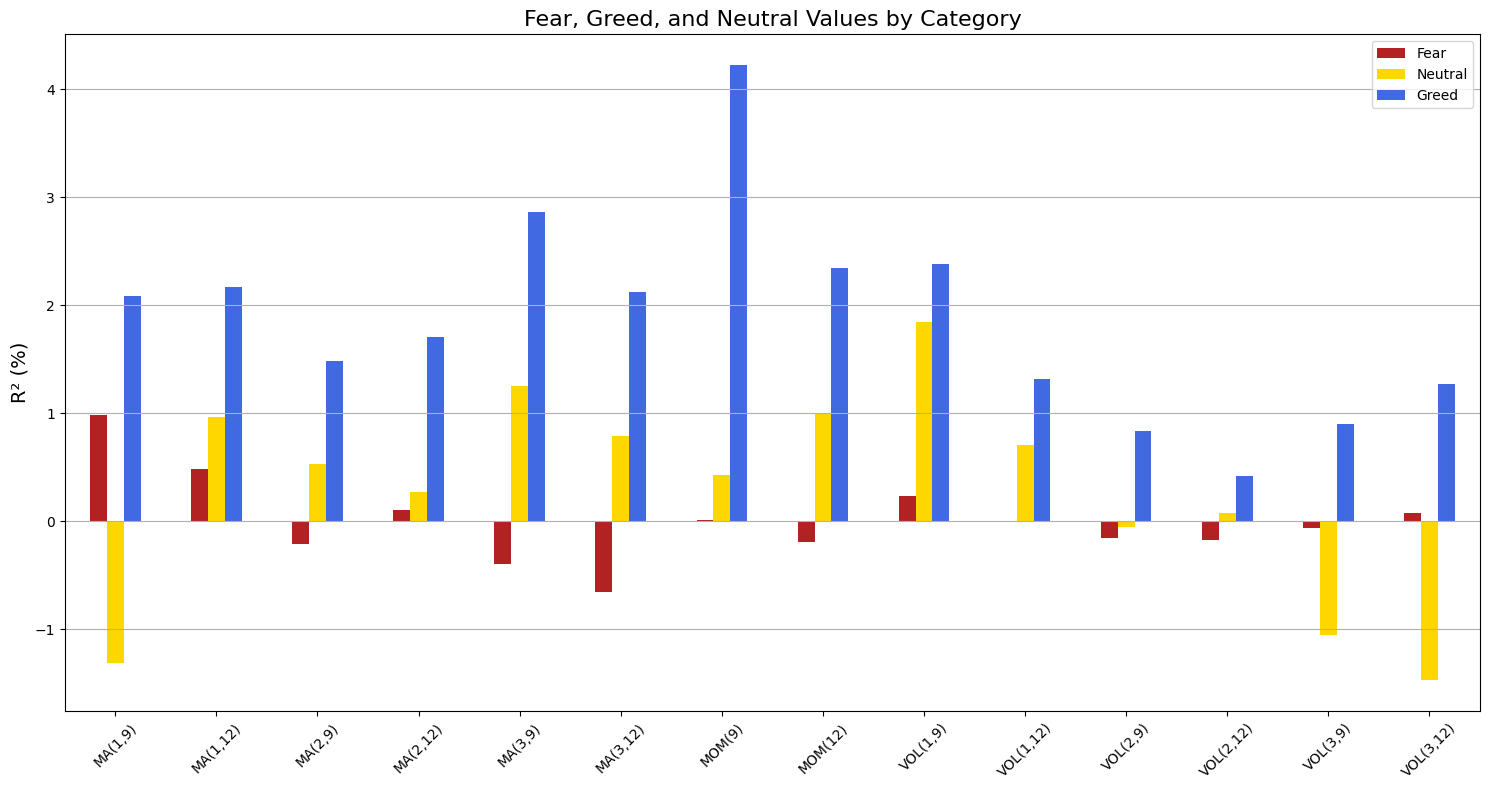

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

r2_df.index = ["MA(1,9)", "MA(1,12)", "MA(2,9)", "MA(2,12)", "MA(3,9)", "MA(3,12)", "MOM(9)", "MOM(12)", "VOL(1,9)", "VOL(1,12)", "VOL(2,9)", "VOL(2,12)", "VOL(3,9)", "VOL(3,12)"]

# Plotting
ax = r2_df[['Fear', 'Neutral', 'Greed']].plot(kind='bar', color=['firebrick', 'gold', 'royalblue'], figsize=(15, 8))
# Customizing plot
ax.set_title("Fear, Greed, and Neutral Values by Category", fontsize=16)
ax.set_xlabel("", fontsize=14)
ax.set_ylabel("R² (%)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
# Show plot
plt.tight_layout()
plt.show()
